In [0]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as pdr
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Get the stock quote
df = pdr.DataReader("YESBANK.NS",data_source="yahoo",start="2012-01-01",end="2020-01-22")
#show The data
df

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-02  48.509998  46.099998  48.000000  46.369999   16278750.0  31.961287
2012-01-03  49.380001  46.599998  47.200001  49.180000   21337225.0  33.898132
2012-01-04  51.000000  47.610001  49.980000  48.209999   19977935.0  33.229534
2012-01-05  49.820000  47.639999  48.200001  49.570000   16636020.0  34.166943
2012-01-06  50.549999  48.500000  49.000000  49.959999   16571055.0  34.435757
...               ...        ...        ...        ...          ...        ...
2020-01-17  39.549999  37.000000  37.599998  39.250000  125635833.0  39.250000
2020-01-20  40.200001  38.450001  39.500000  38.650002   89703186.0  38.650002
2020-01-21  39.200001  38.099998  38.599998  38.349998   67215936.0  38.349998
2020-01-22  39.000000  38.000000  38.700001  38.450001   62396201.0  38.450001
2020-01-23  38.900002  38.349998  38.549999  38.599998    6562230.0  38.599998

[1982 rows x 6 columns]

In [0]:
# Get the number of rows and columns
df.shape

(1982, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


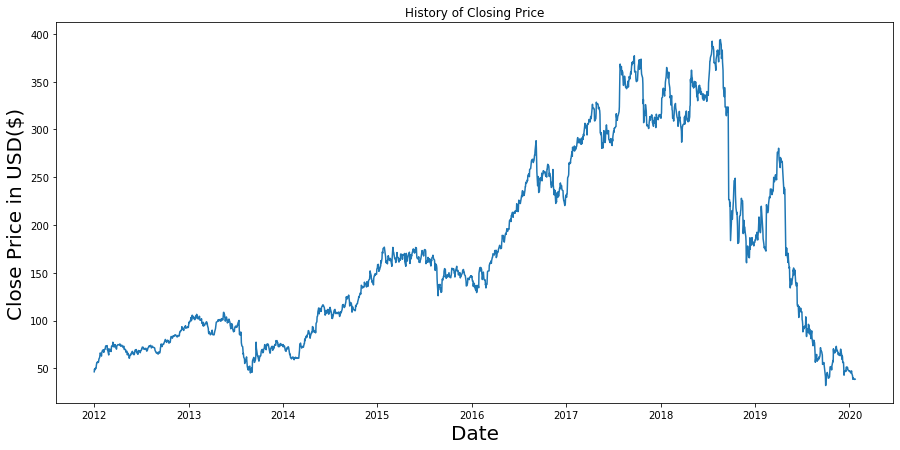

In [0]:
# Visualize the closing price history
plt.figure(figsize=(15,7))
plt.title("History of Closing Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=20)
plt.ylabel("Close Price in USD($)",fontsize=20)
plt.show()

In [0]:
# create a new dataframe with only the "close" column
data = df.filter(["Close"])
# convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1586

In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03969613],
       [0.04745856],
       [0.044779  ],
       ...,
       [0.01754143],
       [0.01781768],
       [0.01823204]])

In [0]:
# Create the training data set
# Create the scaled traing data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_traing and y_train data sets
x_train = []
y_train = [] # target variable
for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0]) 
  if i <=101:
    print(x_train)
    print(y_train)
    print()

[array([0.03969613, 0.04745856, 0.044779  , 0.04853591, 0.04961326,
       0.04917127, 0.05762431, 0.0620442 , 0.06662983, 0.06674033,
       0.06646409, 0.06922652, 0.06687845, 0.07033149, 0.07618785,
       0.08151933, 0.0880663 , 0.09408839, 0.0917127 , 0.08494475,
       0.09417126, 0.09732045, 0.09889504, 0.10207181, 0.10270718,
       0.09812154, 0.09582874, 0.10276242, 0.1037569 , 0.10455801,
       0.10936463, 0.11372928, 0.11450275, 0.11276243, 0.11533149,
       0.10259668, 0.10696133, 0.09930938, 0.08825967, 0.10461327,
       0.10245855, 0.09944751, 0.10522098, 0.09928177, 0.10074586,
       0.09823204, 0.11395028, 0.11303867, 0.11522099, 0.12513813,
       0.11889503, 0.11472375, 0.11102211, 0.11378454, 0.11842542,
       0.11422652, 0.11715471, 0.10947513, 0.10740331, 0.10505525,
       0.11165745, 0.11535912, 0.11770718, 0.11837016, 0.11798342,
       0.11745855, 0.12019338, 0.11922653, 0.11682321, 0.11350828,
       0.11533149, 0.11668508, 0.11596686, 0.11477901, 0.1129

In [0]:
# Convert the x_traing and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [0]:
#Reshaing the data because LSTM expects the data to be three dimentional
x_train.shape

(1486, 100)

In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1486, 100, 1)

In [0]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile the model
model.compile(optimizer="adam",loss="mean_squared_error")

In [0]:
# Train the model
model.fit(x_train, y_train,batch_size=16,epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





1486/1486 [==============================] - 36s 24ms/step - loss: 0.0082
Epoch 2/15
1486/1486 [==============================] - 25s 17ms/step - loss: 5.2687e-04
Epoch 3/15
1486/1486 [==============================] - 26s 17ms/step - loss: 6.2216e-04
Epoch 4/15
1486/1486 [==============================] - 27s 18ms/step - loss: 5.6932e-04
Epoch 5/15
1104/1486 [=====================>........] - ETA: 6s - loss: 4.4408e-04

In [0]:
# Create the testing data set
# Create a new array containing scled values
test_data = scaled_data[training_data_len-100:,:]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range (100,len(test_data)):
  x_test.append(test_data[i-100:i,0])

In [0]:
# Convert the data to numpy array
x_test= np.array(x_test)
x_test

array([[0.4575181 , 0.46444844, 0.46100243, ..., 0.51479883, 0.5208868 ,
        0.52655359],
       [0.46444844, 0.46100243, 0.47214462, ..., 0.5208868 , 0.52655359,
        0.52911896],
       [0.46100243, 0.47214462, 0.4727572 , ..., 0.52655359, 0.52911896,
        0.52712797],
       ...,
       [0.57705711, 0.59179849, 0.59183675, ..., 0.93429565, 0.92889697,
        0.94727576],
       [0.59179849, 0.59183675, 0.6005667 , ..., 0.92889697, 0.94727576,
        0.97193404],
       [0.59183675, 0.6005667 , 0.59987752, ..., 0.94727576, 0.97193404,
        0.97461422]])

In [0]:
# Reshape the data because LSTM 3D shaped data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # unscaling the values

In [0]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.1456543195365679

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


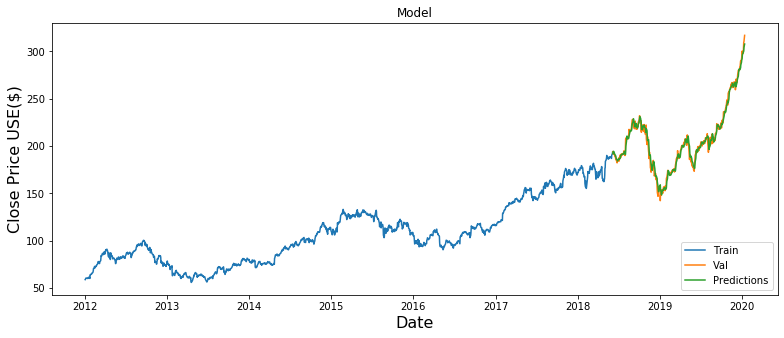

In [0]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(13,5))
plt.title("Model")
plt.xlabel("Date",fontsize = 16)
plt.ylabel("Close Price USE($)",fontsize = 16)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"],loc="lower right")
plt.show()

In [0]:
 # show the valid and predicted prices
 valid

Close  Predictions
Date                               
2018-06-06  193.979996   191.933807
2018-06-07  193.460007   193.576263
2018-06-08  191.699997   194.409927
2018-06-11  191.229996   193.993515
2018-06-12  192.279999   192.956436
...                ...          ...
2020-01-07  298.390015   299.547729
2020-01-08  303.190002   299.492828
2020-01-09  309.630005   300.601440
2020-01-10  310.329987   304.161621
2020-01-13  316.959991   307.752869

[404 rows x 2 columns]

In [0]:
# Get the quote
apple_quote = pdr.DataReader("AAPL",data_source='yahoo',start="2012-01-01",end="2020-01-16")
# create a new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-100:].values
# Scale the data to be values b/w 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
# append the past sixty days to empty list
X_test.append(last_60_days_scaled)
# Conver the X_test data set to a numpy array
X_test= np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[313.87015]]


In [0]:
apple_quote2= pdr.DataReader("AAPL",data_source="yahoo",start="2020-01-17",end="2020-01-17")

print(apple_quote2)

                 High  Low        Open       Close    Volume   Adj Close
Date                                                                    
2020-01-17  318.73999  315  316.269989  318.730011  34454100  318.730011
